Computer Vision Object Dectection
Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.

네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [68]:
import requests

이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.

matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [69]:
import matplotlib.pyplot as plt

In [70]:
from PIL import Image
from io import BytesIO

In [71]:
import json

Subscription Key와 접속에 필요한 URL을 설정합니다.

In [97]:
subscription_key='6b576e93acf847258f0d3fcf6f2a0eba'
vision_base_url='https://labuser13computervision.cognitiveservices.azure.com/vision/v2.0/'

In [98]:
analyze_url=vision_base_url+'analyze'

분석에 사용되는 이미지를 확인 합니다.


In [99]:
image_url='https://www.aiweirdness.com/content/images/size/w795/2022/07/a-vast-herd-of-cute-kittens.png'

In [100]:
con=requests.get(image_url).content
byte=BytesIO(con)
image=Image.open(byte)


#. image=Image.open(BytesIO(request.get(image_url).content))

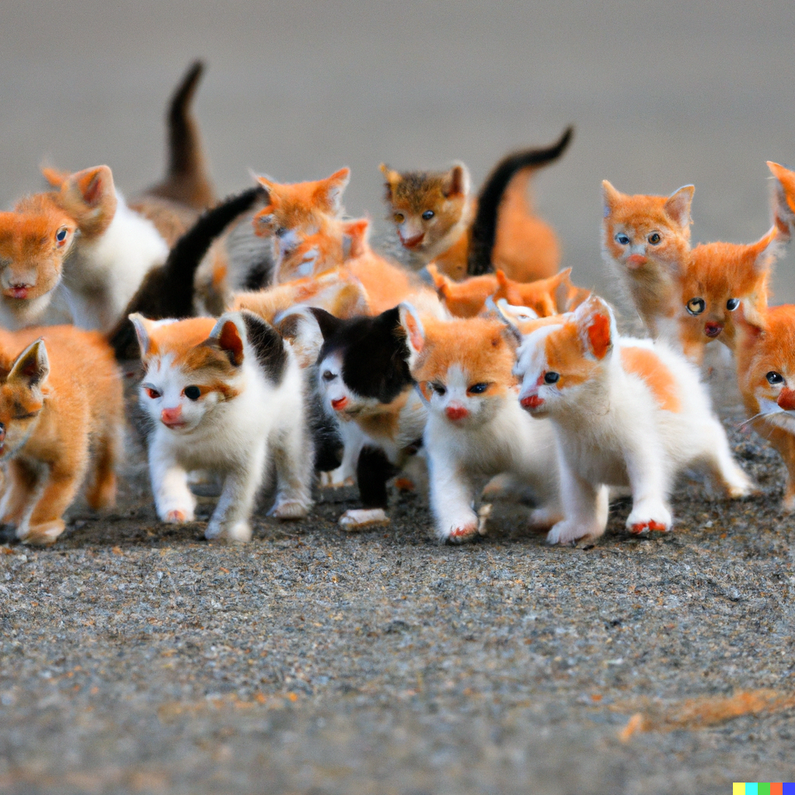

In [101]:
image

In [102]:
headers={'Ocp-Apim-Subscription-key': subscription_key}
params={'visualFeatures':'Categories,Description,Color'}
data={'url':image_url}

In [106]:
response=requests.post(analyze_url, headers=headers, params=params, json=data) #get or post

In [107]:
result=response.json()

In [108]:
result

{'categories': [{'name': 'people_swimming', 'score': 0.6484375}],
 'color': {'dominantColorForeground': 'Grey',
  'dominantColorBackground': 'Grey',
  'dominantColors': ['Grey'],
  'accentColor': 'A56026',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['animal',
   'orange',
   'group',
   'mammal',
   'cat',
   'different',
   'standing',
   'small',
   'bunch',
   'toy',
   'looking',
   'little',
   'dog',
   'walking',
   'brown',
   'bird',
   'lot',
   'playing',
   'flock',
   'colors',
   'mirror',
   'field',
   'herd',
   'beach'],
  'captions': [{'text': 'a flock of seagulls standing next to a cat',
    'confidence': 0.34754920215079893}]},
 'requestId': '57995d6b-3861-403c-825b-4b3db4ffc7c0',
 'metadata': {'height': 795, 'width': 795, 'format': 'Png'}}

In [111]:
image_caption=result['description']['captions'][0]['text']
image_caption

'a flock of seagulls standing next to a cat'

Object Detection

In [112]:
objectDetection_url=vision_base_url+'detect'

In [113]:
image_url='https://thumbs.dreamstime.com/b/view-silverton-colorado-above-colorful-fall-season-co-historic-silverton-colorad-above-town-128883045.jpg'

In [115]:
image=Image.open(BytesIO(requests.get(image_url).content))

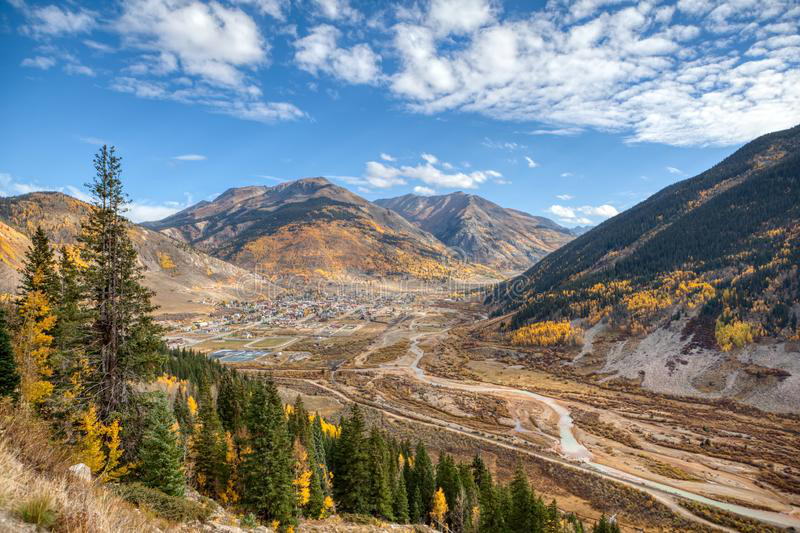

In [116]:
image

In [117]:
headers={'Ocp-Apim-Subscription-key': subscription_key}
params={'visualFeatures':'Categories,Description,Color'}
data={'url':image_url}

In [118]:
response=requests.post(objectDetection_url,headers=headers,params=params,json=data)

In [119]:
result=response.json()
result

{'objects': [],
 'requestId': 'e29d3890-b05c-489a-88a0-2497d964199a',
 'metadata': {'height': 533, 'width': 800, 'format': 'Jpeg'}}